In [1]:
import seaborn as sns 
import numpy as np 
import pandas as pd 
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
encode={'setosa':1, 'versicolor':2, 'virginica':3}

In [4]:
df['species']=df['species'].map(encode)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


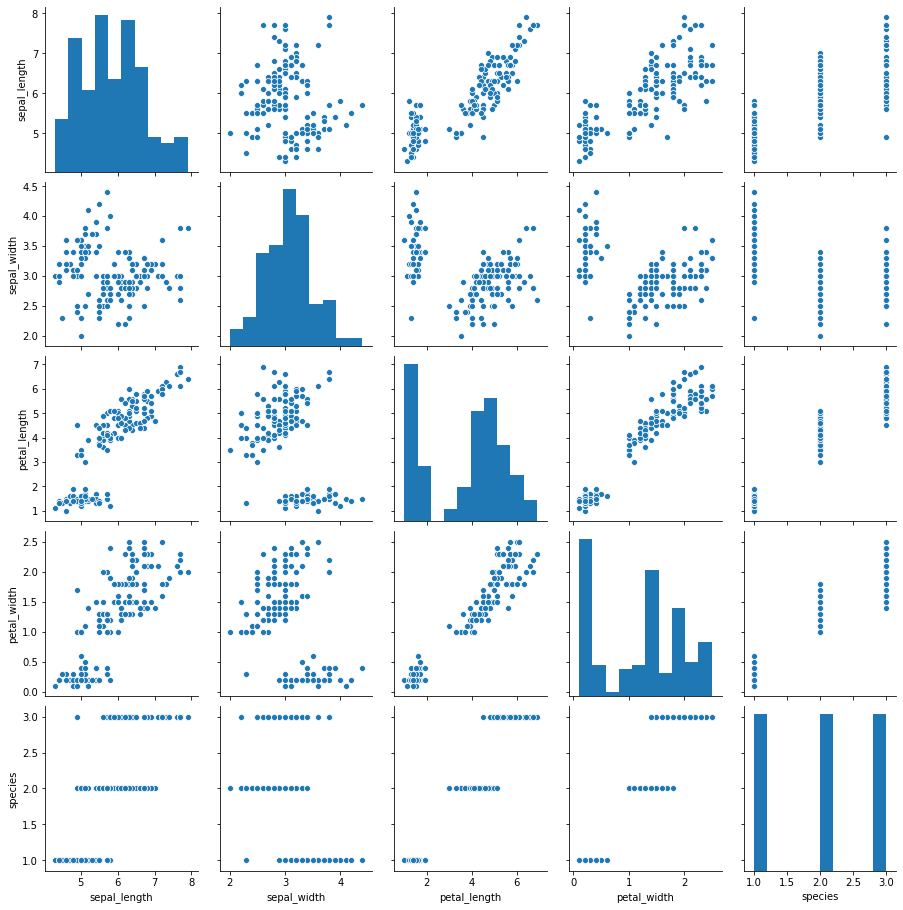

In [5]:
sns.pairplot(df)

In [6]:
X=df.drop(['species'],axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
Y=df['species'].copy()
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: species, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='ovr')
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
Y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
score=accuracy_score(Y_test,Y_pred)
matrix=confusion_matrix(Y_test,Y_pred,labels=[1,2,3])

In [11]:
score

0.9555555555555556

In [12]:
matrix

array([[19,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 13]], dtype=int64)